# Import libaries.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_style("whitegrid")

# Load data.

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [3]:
df_test = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv") 

# View of the train set.

In [4]:
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [5]:
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


# Filter the data.

In [6]:
df_train = df_train[df_train.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]

df_test =df_test[df_test.Commodities.str.contains("APPLE GOLDEN DELICIOUS")]

In [7]:
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55


In [8]:
df_test.head(2)

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


# Check for null values.

In [9]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [10]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

In [11]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [12]:
df_test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


# Remove features that are not needed.

In [13]:
df_train = df_train.drop("Commodities", axis = "columns")

In [14]:
df_test = df_test.drop("Commodities", axis = "columns")

In [15]:
df_train.head(1)

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [16]:
df_test.head(1)

,Index,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0


# Transform non numeric data types to numeric.

In [17]:
Region = LabelEncoder()
Apple_Container = LabelEncoder()
Grade = LabelEncoder()

In [18]:
df_train["Province_n"] = Region.fit_transform(df_train["Province"])
df_train["Container_n"] = Apple_Container.fit_transform(df_train["Container"])
df_train["Size_Grade_n"] = Grade.fit_transform(df_train["Size_Grade"])

In [19]:
df_test["Province_n"] = Region.fit_transform(df_test["Province"])
df_test["Container_n"] = Apple_Container.fit_transform(df_test["Container"])
df_test["Size_Grade_n"] = Grade.fit_transform(df_test["Size_Grade"])

# Drop features that you do not need anymore.

In [20]:
df_train = df_train.drop(["Province", "Container", "Size_Grade", "Date"], axis = "columns")

In [21]:
df_test = df_test.drop(["Province", "Container", "Size_Grade", "Date"], axis = "columns")

# Check for outliers in your data.

In [22]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

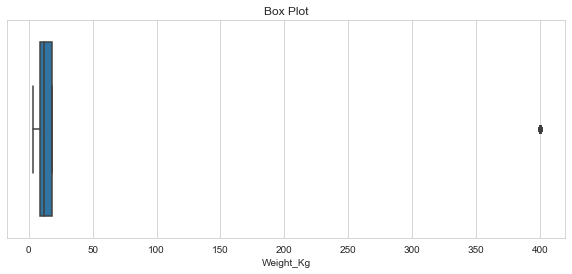

In [23]:
Box_plots(df_train['Weight_Kg'])

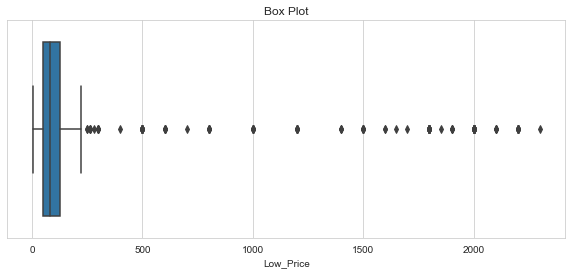

In [24]:
Box_plots(df_train['Low_Price'])

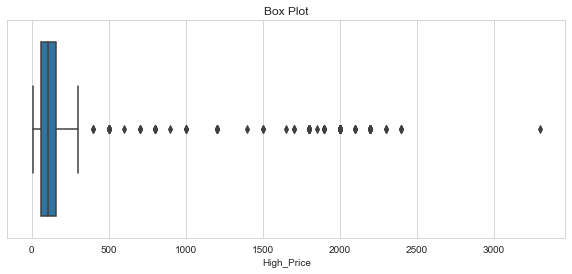

In [25]:
Box_plots(df_train['High_Price'])

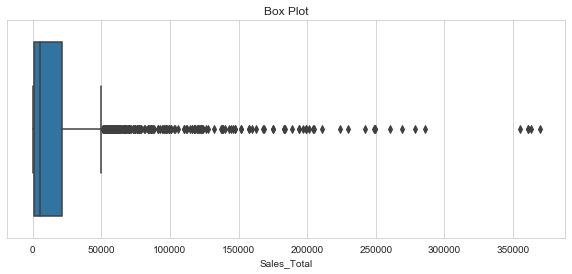

In [26]:
Box_plots(df_train['Sales_Total'])

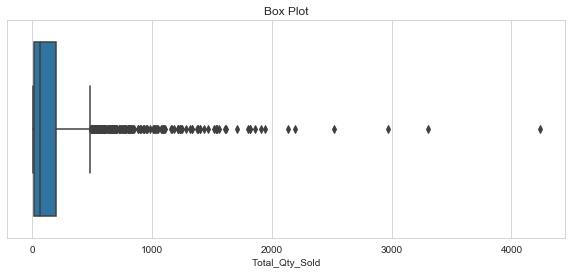

In [27]:
Box_plots(df_train['Total_Qty_Sold'])

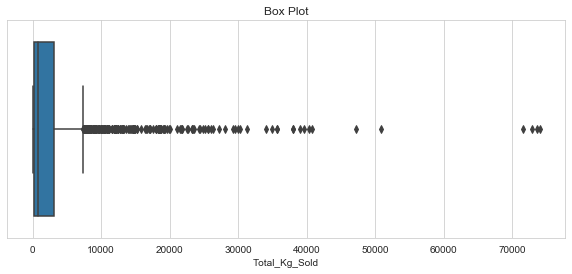

In [28]:
Box_plots(df_train['Total_Kg_Sold'])

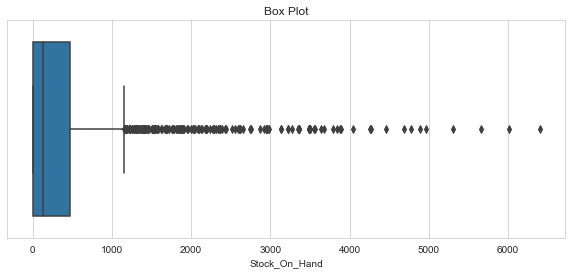

In [29]:
Box_plots(df_train['Stock_On_Hand'])

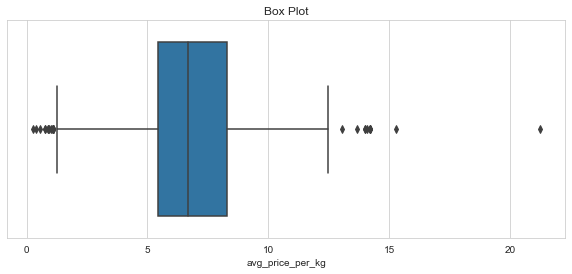

In [30]:
Box_plots(df_train['avg_price_per_kg'])

# Remove outliers.

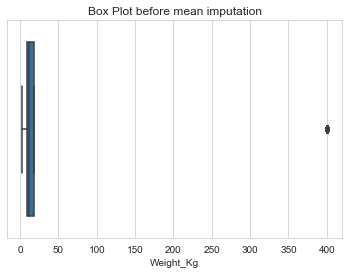

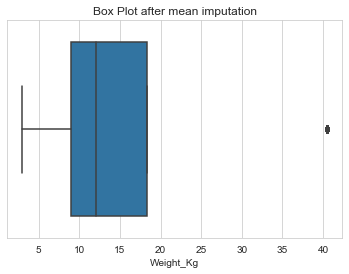

In [31]:
sns.boxplot(df_train['Weight_Kg'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Weight_Kg'].quantile(0.25)
q3 = df_train['Weight_Kg'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Weight_Kg'])
for i in df_train['Weight_Kg']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Weight_Kg'] = df_train['Weight_Kg'].replace(i, m)
sns.boxplot(df_train['Weight_Kg'])
plt.title("Box Plot after mean imputation")
plt.show()   


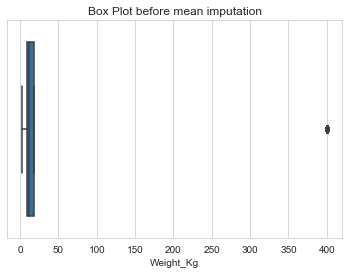

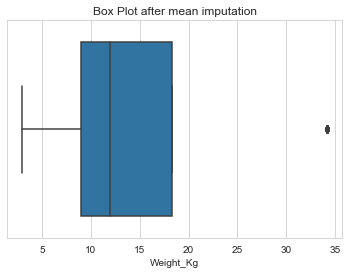

In [32]:
sns.boxplot(df_test['Weight_Kg'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Weight_Kg'].quantile(0.25)
q3 = df_test['Weight_Kg'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Weight_Kg'])
for i in df_test['Weight_Kg']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Weight_Kg'] = df_test['Weight_Kg'].replace(i, m)
sns.boxplot(df_test['Weight_Kg'])
plt.title("Box Plot after mean imputation")
plt.show()   


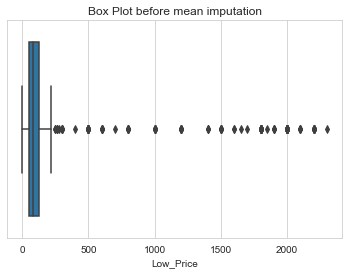

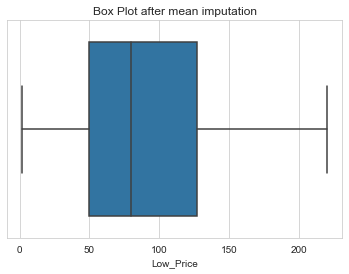

In [33]:
sns.boxplot(df_train['Low_Price'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Low_Price'].quantile(0.25)
q3 = df_train['Low_Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Low_Price'])
for i in df_train['Low_Price']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Low_Price'] = df_train['Low_Price'].replace(i, m)
sns.boxplot(df_train['Low_Price'])
plt.title("Box Plot after mean imputation")
plt.show()   


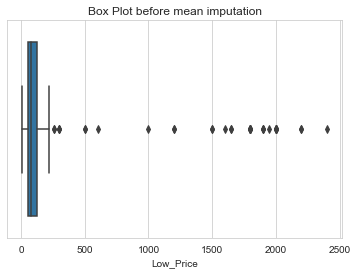

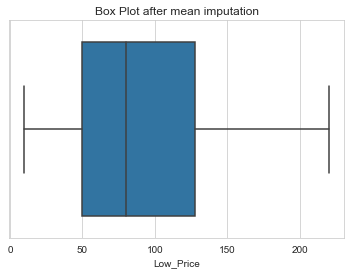

In [34]:
sns.boxplot(df_test['Low_Price'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Low_Price'].quantile(0.25)
q3 = df_test['Low_Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Low_Price'])
for i in df_test['Low_Price']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Low_Price'] = df_test['Low_Price'].replace(i, m)
sns.boxplot(df_test['Low_Price'])
plt.title("Box Plot after mean imputation")
plt.show()   


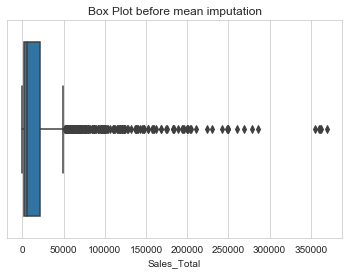

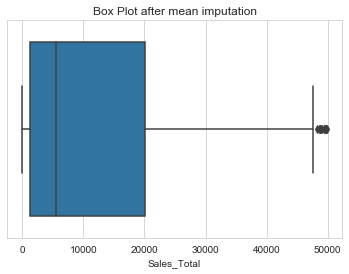

In [35]:
sns.boxplot(df_train['Sales_Total'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Sales_Total'].quantile(0.25)
q3 = df_train['Sales_Total'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Sales_Total'])
for i in df_train['Sales_Total']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Sales_Total'] = df_train['Sales_Total'].replace(i, m)
sns.boxplot(df_train['Sales_Total'])
plt.title("Box Plot after mean imputation")
plt.show()   


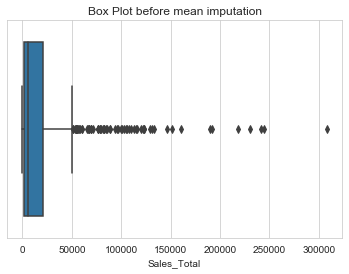

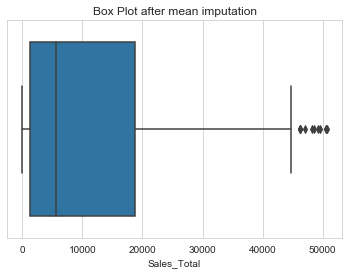

In [36]:
sns.boxplot(df_test['Sales_Total'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Sales_Total'].quantile(0.25)
q3 = df_test['Sales_Total'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Sales_Total'])
for i in df_test['Sales_Total']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Sales_Total'] = df_test['Sales_Total'].replace(i, m)
sns.boxplot(df_test['Sales_Total'])
plt.title("Box Plot after mean imputation")
plt.show()   


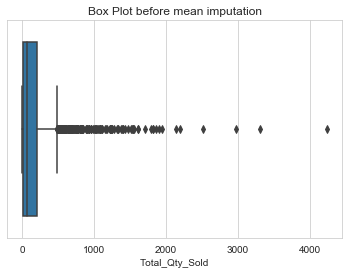

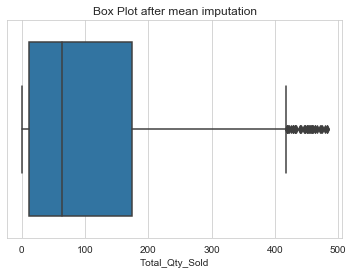

In [37]:
sns.boxplot(df_train['Total_Qty_Sold'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Total_Qty_Sold'].quantile(0.25)
q3 = df_train['Total_Qty_Sold'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Total_Qty_Sold'])
for i in df_train['Total_Qty_Sold']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Total_Qty_Sold'] = df_train['Total_Qty_Sold'].replace(i, m)
sns.boxplot(df_train['Total_Qty_Sold'])
plt.title("Box Plot after mean imputation")
plt.show()   


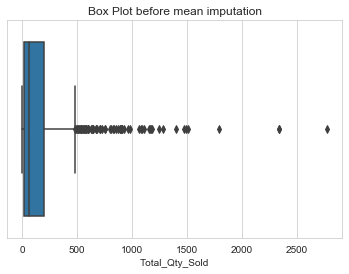

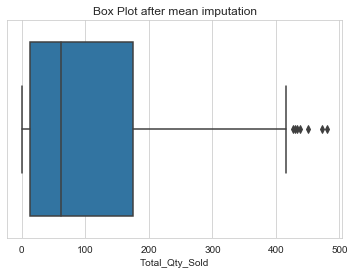

In [38]:
sns.boxplot(df_test['Total_Qty_Sold'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Total_Qty_Sold'].quantile(0.25)
q3 = df_test['Total_Qty_Sold'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Total_Qty_Sold'])
for i in df_test['Total_Qty_Sold']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Total_Qty_Sold'] = df_test['Total_Qty_Sold'].replace(i, m)
sns.boxplot(df_test['Total_Qty_Sold'])
plt.title("Box Plot after mean imputation")
plt.show()   


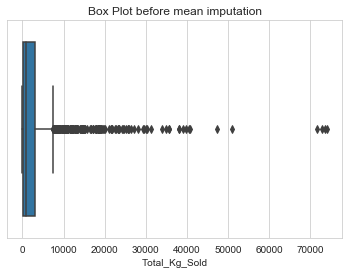

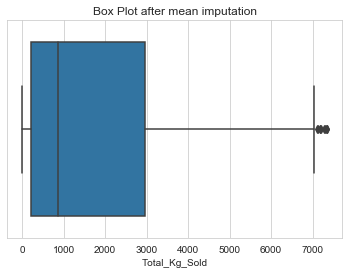

In [39]:
sns.boxplot(df_train['Total_Kg_Sold'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Total_Kg_Sold'].quantile(0.25)
q3 = df_train['Total_Kg_Sold'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Total_Kg_Sold'])
for i in df_train['Total_Kg_Sold']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Total_Kg_Sold'] = df_train['Total_Kg_Sold'].replace(i, m)
sns.boxplot(df_train['Total_Kg_Sold'])
plt.title("Box Plot after mean imputation")
plt.show()   


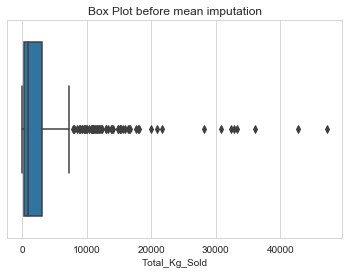

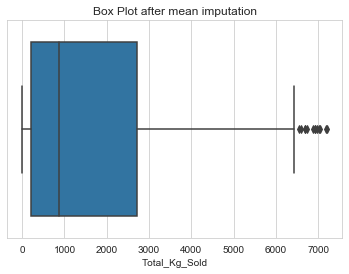

In [40]:
sns.boxplot(df_test['Total_Kg_Sold'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Total_Kg_Sold'].quantile(0.25)
q3 = df_test['Total_Kg_Sold'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Total_Kg_Sold'])
for i in df_test['Total_Kg_Sold']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Total_Kg_Sold'] = df_test['Total_Kg_Sold'].replace(i, m)
sns.boxplot(df_test['Total_Kg_Sold'])
plt.title("Box Plot after mean imputation")
plt.show()   


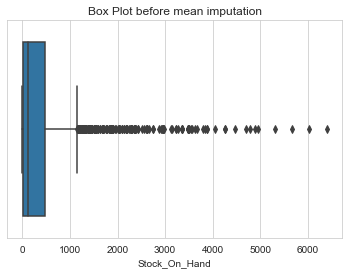

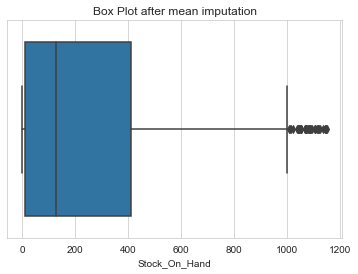

In [41]:
sns.boxplot(df_train['Stock_On_Hand'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['Stock_On_Hand'].quantile(0.25)
q3 = df_train['Stock_On_Hand'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['Stock_On_Hand'])
for i in df_train['Stock_On_Hand']:
    if i > Upper_tail or i < Lower_tail:
            df_train['Stock_On_Hand'] = df_train['Stock_On_Hand'].replace(i, m)
sns.boxplot(df_train['Stock_On_Hand'])
plt.title("Box Plot after mean imputation")
plt.show()   


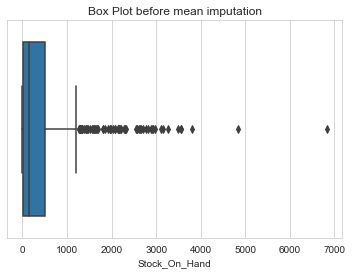

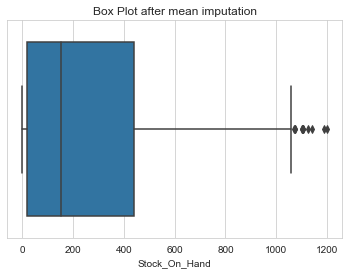

In [42]:
sns.boxplot(df_test['Stock_On_Hand'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_test['Stock_On_Hand'].quantile(0.25)
q3 = df_test['Stock_On_Hand'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_test['Stock_On_Hand'])
for i in df_test['Stock_On_Hand']:
    if i > Upper_tail or i < Lower_tail:
            df_test['Stock_On_Hand'] = df_test['Stock_On_Hand'].replace(i, m)
sns.boxplot(df_test['Stock_On_Hand'])
plt.title("Box Plot after mean imputation")
plt.show()   


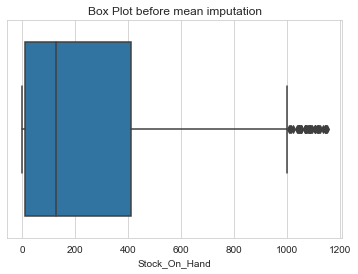

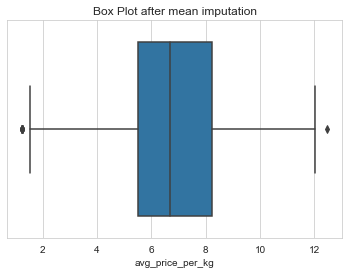

In [43]:
sns.boxplot(df_train['Stock_On_Hand'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df_train['avg_price_per_kg'].quantile(0.25)
q3 = df_train['avg_price_per_kg'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df_train['avg_price_per_kg'])
for i in df_train['avg_price_per_kg']:
    if i > Upper_tail or i < Lower_tail:
            df_train['avg_price_per_kg'] = df_train['avg_price_per_kg'].replace(i, m)
sns.boxplot(df_train['avg_price_per_kg'])
plt.title("Box Plot after mean imputation")
plt.show()   


In [44]:
df_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_n,Container_n,Size_Grade_n
1,18.300000,150.000000,170.0,20053.533811,332.0,6075.6,822.000000,8.51,0,8,0
7,11.000000,50.000000,50.0,16000.000000,320.0,3520.0,0.000000,4.55,0,7,6
24,9.000000,55.000000,55.0,990.000000,18.0,162.0,408.393955,6.11,5,6,7
40,18.300000,80.000000,120.0,32020.000000,388.0,7100.4,443.000000,4.51,0,8,2
69,40.460912,174.307377,1800.0,1800.000000,1.0,400.0,2.000000,4.50,1,5,2


In [45]:
df_test.head()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_n,Container_n,Size_Grade_n
0,1,12.0,128.0,136.0,5008.0,38.0,456.0,0.0,5,2,1
1,2,18.3,220.0,220.0,1760.0,8.0,146.4,2.0,5,8,4
2,3,12.0,120.0,120.0,720.0,6.0,72.0,45.0,5,2,2
3,4,18.3,160.0,160.0,160.0,1.0,18.3,8.0,5,8,1
4,5,18.3,140.0,160.0,14140.0,100.0,1830.0,19.0,5,8,0


In [46]:
df_test["Price"] =""

In [47]:
df_test.head()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_n,Container_n,Size_Grade_n,Price
0,1,12.0,128.0,136.0,5008.0,38.0,456.0,0.0,5,2,1,
1,2,18.3,220.0,220.0,1760.0,8.0,146.4,2.0,5,8,4,
2,3,12.0,120.0,120.0,720.0,6.0,72.0,45.0,5,2,2,
3,4,18.3,160.0,160.0,160.0,1.0,18.3,8.0,5,8,1,
4,5,18.3,140.0,160.0,14140.0,100.0,1830.0,19.0,5,8,0,


In [48]:
#define the variables
x = df_train[["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Province_n","Container_n","Size_Grade_n"]]

y = df_train[['avg_price_per_kg']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

In [50]:
lr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

Linear Regression
training set score : 0.71
test set score: 0.77


In [51]:
pred = lr.predict(X_test)
preds = np.concatenate(pred) #flatten array
preds

array([10.38560238,  5.91454622,  4.51624801,  8.72709908,  5.49495922,
        7.14164062,  7.43231975, 11.00681358,  5.15434892,  8.11341728,
        8.34234208,  5.79922725,  6.51299013,  8.66746306,  7.75309897,
        5.12553179,  5.75733139,  8.80071255,  5.88190295,  7.67174704,
        6.36019686,  5.70999171,  4.02154001, 10.00308354,  5.61259162,
        5.7949948 ,  6.46224148,  5.91176179,  8.7469773 ,  7.85578246,
        5.55684333,  5.831449  ,  4.98465711,  5.24633997,  7.39227607,
        8.40728708,  4.0615345 ,  8.41517979, 11.10375998,  9.16496423,
        8.27702906,  3.95659185,  6.59737954,  4.7368217 ,  5.33968483,
        6.37093757,  4.89331685,  9.53407426,  6.59804536,  5.78307745,
        5.34568058,  7.21032075,  9.52318983,  6.43609226,  5.9529998 ,
        6.06457657,  6.7786327 ,  6.35549713,  5.55018986,  6.04487066,
        4.70088909,  5.47665334,  5.1233937 ,  4.91386523,  9.04913855,
        4.18314427,  4.67788232,  8.89365948,  5.10390849,  8.96

In [52]:
print(f'The coefficients are: {lr.coef_}\n')
print(f'The intercept is {lr.intercept_}')

The coefficients are: [[-2.37547884e-01  4.30211067e-02  3.26670404e-04  5.46481047e-05
   5.40998011e-04 -2.90778446e-04  5.68557747e-04 -2.46513031e-02
  -1.32286326e-02 -1.40740508e-01]]

The intercept is [6.63172532]


In [53]:
round(lr.score(X_test, y_test),2)

0.77

# Save the model in a pickle file.

In [54]:
model_save_path = "mlr_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(lr, file)

# Read from a pickle file.

In [55]:
model_load_path = "mlr_model.plk"

with open(model_load_path, "rb") as file:
    unpickled_model = pickle.load

In [56]:
print('Ridge')
ridge = Ridge().fit(X_train, y_train)
print("\nTraining set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge

Training set score : 0.71
test set score: 0.77


In [57]:
print('Lasso')
lasso = Lasso().fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso

Training set score: 0.66
Test set score: 0.73


In [58]:
RF = RandomForestRegressor(n_estimators=200, max_depth=15)
RF.fit(X_train,y_train)

C:\Users\Tiyani Baloyi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
prediction = RF.predict(X_test)
prediction

array([10.3081875 ,  6.08983393,  2.60435   ,  9.22186764,  4.58185309,
        8.56405797,  8.02692623, 11.52575   ,  5.4455    ,  8.18408589,
        9.05537833,  1.7662    ,  5.60865   ,  8.66965   ,  7.1342638 ,
        3.37708333,  4.8317    , 10.00105   ,  5.68289458,  7.98073753,
        5.80179298,  5.55202619,  6.61302664, 10.75689447,  6.0767325 ,
        7.22375483,  6.92801047,  6.11467788,  8.02123017,  7.65725073,
        6.07489009,  5.56      ,  4.26795   ,  5.09352917,  7.61177282,
        9.45509913,  5.1133    ,  8.052     , 11.7343    ,  9.35155   ,
        7.08854141,  4.4709    ,  7.09555905,  3.1889    ,  4.53795   ,
        6.87918356,  3.3606744 , 10.11075909,  6.78230077,  5.56      ,
        5.33011702,  7.01915411,  9.84305   ,  6.6729    ,  5.23853083,
        6.22257626,  6.33763989,  6.67      ,  5.22835   ,  5.6864    ,
        4.91035   ,  5.56      ,  4.7097185 ,  7.3924    ,  9.287     ,
        2.43135   ,  3.27558893,  9.59824978,  2.8524502 ,  8.08

In [60]:
print (f"The prediction accuracy is {round (RF.score(X_test, y_test),2)}")

The prediction accuracy is 0.95


In [61]:
sub = pd.DataFrame(prediction)

In [62]:
sub_df = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/sample_submission.csv')

In [63]:
dataset = pd.concat([df_test["Index"], sub], axis = 1)

In [64]:
dataset.columns = ["Index", "avg_price_per_kg"]

In [65]:
dataset.to_csv("Submission.csv", index = False)

In [66]:
print('RMSE:',np.sqrt(mean_squared_error(y_test, prediction)))

RMSE: 0.4921714850231151
